You need to install the required packages. 
Please run the following and restart the kernel:
pip3 install -r requirements.txt

First of all, The data on the excel was converted to csv format to be able to read it easily. Then, this portion of the code is to just read that dataset. The result of this code is data1 and data 2 which are the datetime objects of day1 and day2 respectively.

In [1]:
from datetime import datetime
with open('dataset') as f:
    data = f.readlines()
data = [x.strip() for x in data]
day1 = [i.split(",")[1] for i in data]
day2 = [i.split(",")[2] for i in data if len(i.split(",")) > 2]
day1 = [datetime.strptime(i, '%H:%M:%S') for i in day1]
day2 = [datetime.strptime(i, '%H:%M:%S') for i in day2]


The rest of the quastions are from Day1.

QUESTION 1) 
Plot the inter-arrival times based on the given set of observations. Is there an obvious
pattern? Visually evaluate whether the data has stationary mean, or not. Repeat for the
variance

QUESTION 3)
Find sample mean, standard deviation and other descriptive statistics that you deem
appropriate

** I will answer these questions together.

To do so, I firstly calculated the inter-arrival times by subtracting the arrival times from each other. Then, I plotted the inter-arrival times and the variance of the inter-arrival times. 

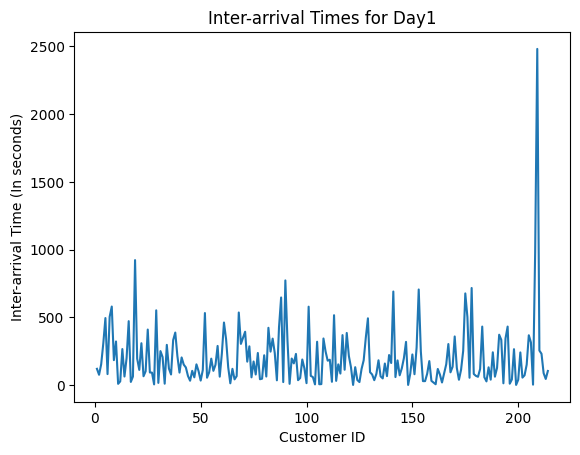

In [2]:
import matplotlib.pyplot as plt
inter_day1 = []
customer_id = [i for i in range(1, len(day1))] # len(day1) = 215
for i in range(0, len(day1)-1):
    a  = (day1[i+1]-day1[i]).total_seconds()
    inter_day1.append(a)

plt.plot(customer_id, inter_day1)
plt.title("Inter-arrival Times for Day1")
plt.xlabel("Customer ID")
plt.ylabel("Inter-arrival Time (In seconds)")
plt.show() 

In [3]:
import numpy as np
import math
mean     = np.mean(inter_day1)
variance = np.var(inter_day1)
std_dev  = math.sqrt(variance)
median   = np.median(inter_day1)
print("Mean of interarrival times for Day1              : ", mean)
print("Variance of interarrival times for Day1          : ", variance)
print("Standard deviation of interarrival times for Day1: ", std_dev)
print("Median of interarrival times for Day1            : ", median)


Mean of interarrival times for Day1              :  200.02336448598132
Variance of interarrival times for Day1          :  57066.15365970827
Standard deviation of interarrival times for Day1:  238.88523114606366
Median of interarrival times for Day1            :  127.5


Then, to see if the data has stationary mean or stationary variance, I plot them with the mean and variance of the inter-arrival times.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


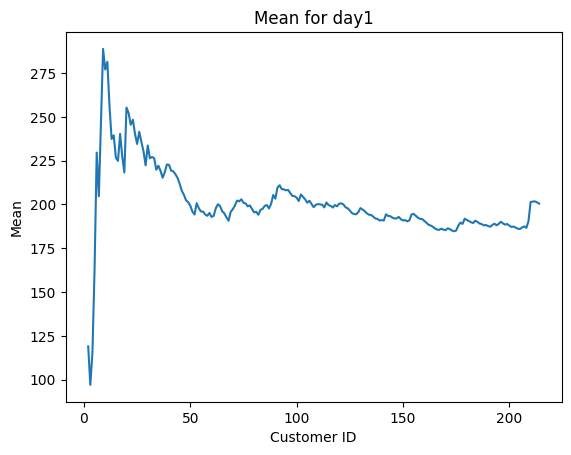

In [4]:
#Mean
mean_list = []
for i in range(0, len(inter_day1)):
    mean_list.append(np.mean(inter_day1[0:i]))
plt.plot(customer_id, mean_list)
plt.title("Mean for day1")
plt.xlabel("Customer ID")
plt.ylabel("Mean")
plt.show()



As we can see from the plots, the data has stationary. Let's see how the variance behaves.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


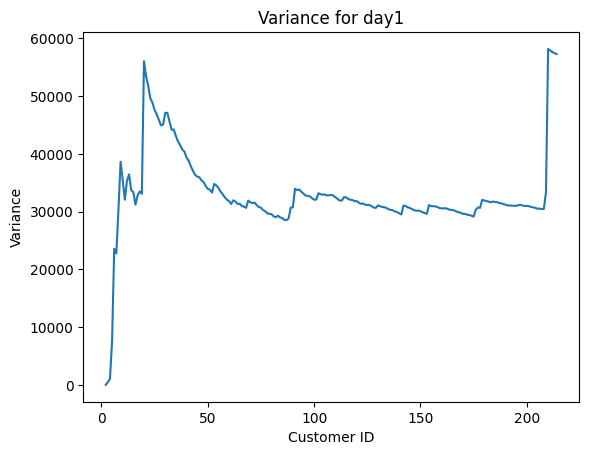

In [5]:
#Variance
variance_list = []
for i in range(0, len(inter_day1)):
    variance_list.append(np.var(inter_day1[0:i]))
plt.plot(customer_id, variance_list)
plt.title("Variance for day1")
plt.xlabel("Customer ID")
plt.ylabel("Variance")
plt.show()

As can bee seen from the plot, the variance is also trying to be stationary, but the last 10 customers's variance is a pretty higher than the rest. If we had more customers, we would be more confident to say the variance is stationary. For the final conclusion, we can say that the data has stationary mean and variance.

Then I also wanted to plot the autocorrelation of the inter-arrival times.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


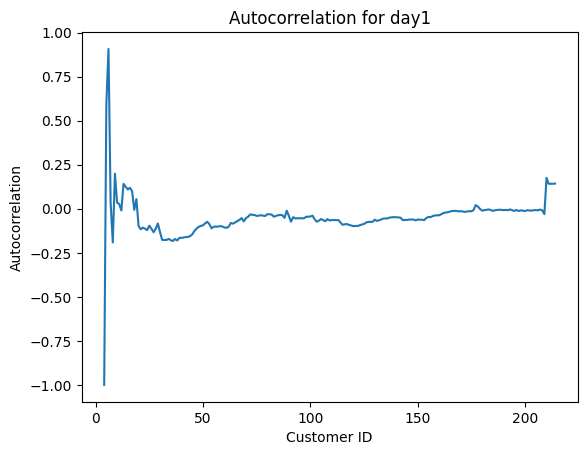

In [6]:
import pandas as pd
#Autocorrelation
autocorr_list = []
for i in range(0, len(inter_day1)):
    autocorr_list.append(pd.Series(inter_day1[0:i]).autocorr())
plt.plot(customer_id, autocorr_list)
plt.title("Autocorrelation for day1")
plt.xlabel("Customer ID")
plt.ylabel("Autocorrelation")
plt.show()

From the graph, we can see the autocorrelation moves aroung the zero line.

As we can see in the tables, the mean and variance are being stationary, but there is some outliers in the data. These outliers which are the values that are far from the mean, can be seen in the plots. So I just wonder what if we decided to examine the data without these outliers, in other words I will do the all steps again witout data after 21:04:10. 


In [7]:
customer_id_cutted = customer_id[:-6]
inter_day1_cutted  = inter_day1[:-6]

In this way, I am expecting to see a more stationary data. Let's see if it is true.

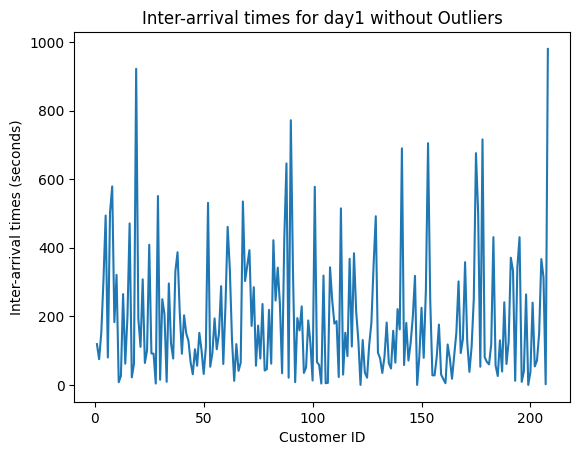

In [8]:
plt.plot(customer_id_cutted, inter_day1_cutted)
plt.title("Inter-arrival times for day1 without Outliers")
plt.xlabel("Customer ID")
plt.ylabel("Inter-arrival times (seconds)")
plt.show() 

In [9]:
mean_cutted     = np.mean(inter_day1_cutted)
variance_cutted = np.var(inter_day1_cutted)
std_dev_cutted   = math.sqrt(variance_)
median_cutted    = np.median(inter_day1_cutted)
print("Mean of interarrival times for day1 without Outliers              : ", mean_cutted)
print("Variance of interarrival times for day1 without Outliers          : ", variance_cutted)
print("Standard deviation of interarrival times for day1 without Outliers: ", std_dev_cutted)
print("Median of interarrival times for day1 without Outliers            : ", median_cutted)


NameError: name 'variance_' is not defined

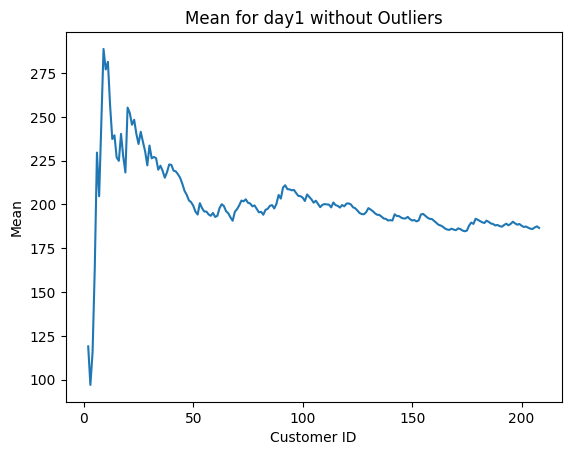

In [ ]:
#Mean
mean_list_cutted = []
for i in range(0, len(inter_day1_cutted)):
    mean_list_cutted.append(np.mean(inter_day1_cutted[0:i]))
plt.plot(customer_id_cutted, mean_list_cutted)
plt.title("Mean for day1 without Outliers")
plt.xlabel("Customer ID")
plt.ylabel("Mean")
plt.show()

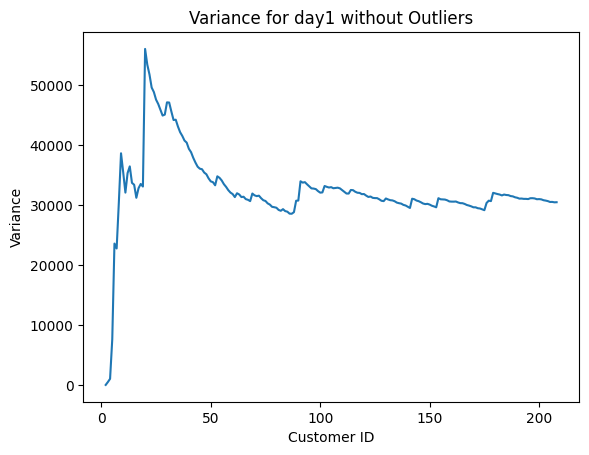

In [ ]:
#Variance
variance_list_cutted = []
for i in range(0, len(inter_day1_cutted)):
    variance_list_cutted.append(np.var(inter_day1_cutted[0:i]))
plt.plot(customer_id_cutted, variance_list_cutted)
plt.title("Variance for day1 without Outliers")
plt.xlabel("Customer ID")
plt.ylabel("Variance")
plt.show()

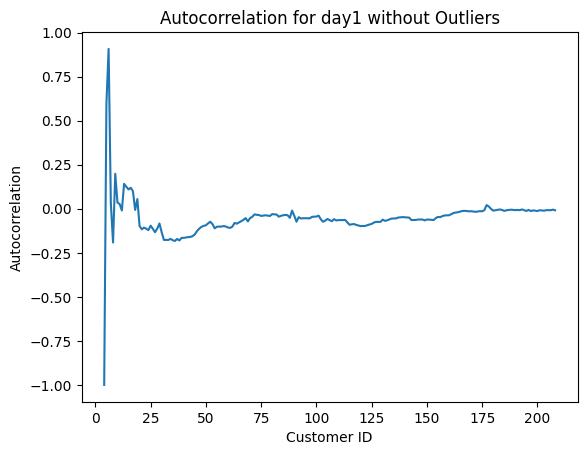

In [ ]:
#Autocorrelation
autocorr_list_cutted = []
for i in range(0, len(inter_day1_cutted)):
    autocorr_list_cutted.append(pd.Series(inter_day1_cutted[0:i]).autocorr())
plt.plot(customer_id_cutted, autocorr_list_cutted)
plt.title("Autocorrelation for day1 without Outliers")
plt.xlabel("Customer ID")
plt.ylabel("Autocorrelation")
plt.show()

With this new data, we can easily see that the mean and variance are now more and more being stationary. If we have more data to compare, we would do what to do. What I mean is we would know those outliers were just exceptions or normal data points that have enough possibility to happen. But for now, we can say that the data is stationary and the new data is more stationary than the old one.

QUESTION 2)
One of the managers claims that it is safe to assume that inter-arrival times are
distributed uniformly between 0 and 300 seconds. Test the validity of this claim using
the Kolmogorov-Smirnov test with a significance level of 0.05.

Kolmogorov-Smirnov test
Null hypothesis        : The data is from a uniform distribution
Alternative hypothesis : The data is not from a uniform distribution

CDF of the uniform distribution(0,300). To do so, I created len(interarrival_times) times random numbers between 0 and 300 with seed = 5353. Then plot it to see the differences visually. After that I will also perform the Kolmogorov-Smirnov test to see if the data is from a uniform distribution or not.

F(x) = (x-a)/(b-a) for x in [a,b] and 0 otherwise.



Text(0.5, 1.0, 'CDF of Uniform Distribution')

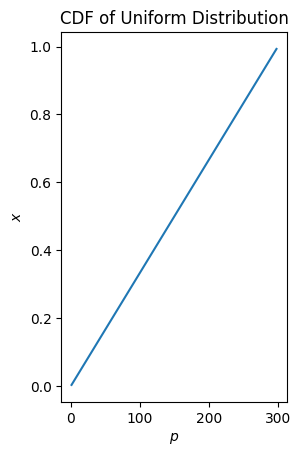

In [ ]:
from scipy import stats
import scipy
import seaborn as sns


uniform_data = []
np.random.seed(5353)
for i in range(214):
    uniform_data.append(np.random.uniform(0,300))
uniform_data_sorted = sorted(uniform_data)
cdf_uniform_data = []
for i in range(214):
    cdf_uniform_data.append(uniform_data_sorted[i]/300) # 

fig = plt.figure()
ax1 = fig.add_subplot(122)
ax1.plot(uniform_data_sorted, cdf_uniform_data)
ax1.set_xlabel('$p$')
ax1.set_ylabel('$x$')
ax1.set_title('CDF of Uniform Distribution')


CDF of our inter-arrival times

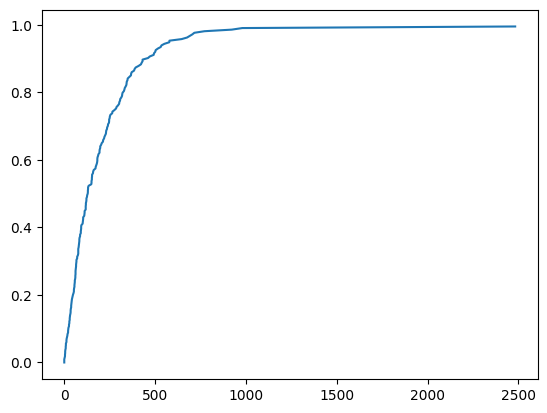

In [ ]:
inter_day1_sorted   = sorted(inter_day1)
cdf_inter_day1 = []
for i in range(214):
    cdf_inter_day1.append(inter_day1_sorted[i]/300)

plt.plot(np.sort(inter_day1_sorted), np.linspace(0, 1, len(inter_day1_sorted), endpoint=False))

Plotting them together

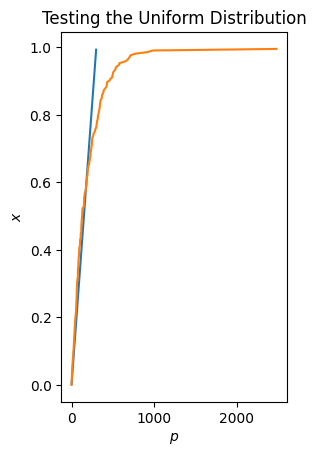

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(122)
ax1.plot(uniform_data_sorted, cdf_uniform_data)
ax1.set_xlabel('$p$')
ax1.set_ylabel('$x$')
ax1.set_title('Testing the Uniform Distribution')

plt.plot(np.sort(inter_day1_sorted), np.linspace(0, 1, len(inter_day1_sorted), endpoint=False))

As you can see sinces 300 is not a big number, the CDF of the uniform distribution is not a good fit for our data. Let's try with the data < 300, for just wondering what will happen.

164

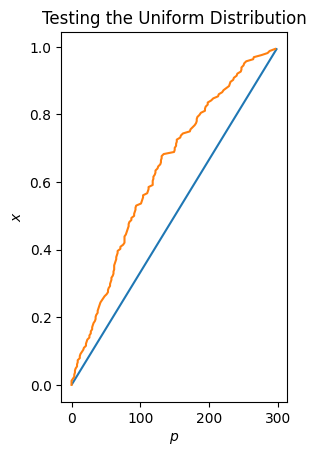

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(122)
ax1.plot(uniform_data_sorted, cdf_uniform_data)
ax1.set_xlabel('$p$')
ax1.set_ylabel('$x$')
ax1.set_title('Testing the Uniform Distribution')

inter_day1_sorted_cut =[i for i in inter_day1_sorted if i <= 300]
plt.plot(np.sort(inter_day1_sorted_cut), np.linspace(0, 1, len(inter_day1_sorted_cut), endpoint=False))
len(inter_day1_sorted_cut)

Now we can talk about the numbers. However, we have lost the data that is bigger than 300, which are 90 data points. So, we can say that the data is not from a uniform distribution between 0 and 300. 

Let's perform the Kolmogorov-Smirnov test to see if the data is from a uniform distribution or not.

In [ ]:
ranked_ri = inter_day1_sorted
f_o = []
for i in range(1, len(ranked_ri)+1):
    f_o.append(i/len(ranked_ri))
def get_cdf(x):
    return scipy.stats.uniform.cdf(x, loc=0, scale=300)
f_e = []
for i in range(1, len(ranked_ri)+1):
    f_e.append(get_cdf(ranked_ri[i-1]))

diff = [] 
for i in range(1, len(ranked_ri)):
    diff.append(abs(f_e[i] - f_o[i-1]))
    diff.append(abs(f_e[i] - f_o[i]))

number_from_table = 1.35810 / math.sqrt(214)
number_from_table, max(diff)

(0.09283780474921953, 0.23364485981308414)

After performing the test, we can see that the value is 0.23364485981308414 which is much and much bigger than 0.09283780474921953. So, we can reject the null hypothesis and say that the data is not from a uniform distribution. Actually, we already knew that from the plots, but it is good to see the numbers. 

QUESTION 4)
Draw frequency histograms of the data for 5, 10 and 20 seconds. Comment on the shape
of the histograms.

Firstly, I will plot the histogram of the inter-arrival times with bin = sqrt(N)

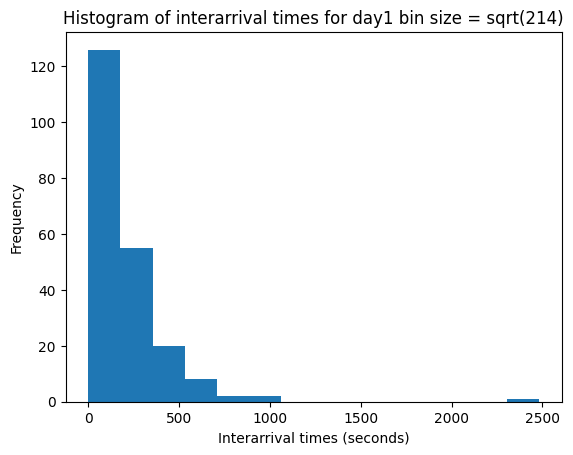

In [ ]:
plt.hist(inter_day1, bins=int(math.sqrt(len(inter_day1))))
plt.title("Histogram of interarrival times for day1 bin size = sqrt(214)")
plt.xlabel("Interarrival times (seconds)")
plt.ylabel("Frequency")
plt.show()

I want to test the data also without outliers.

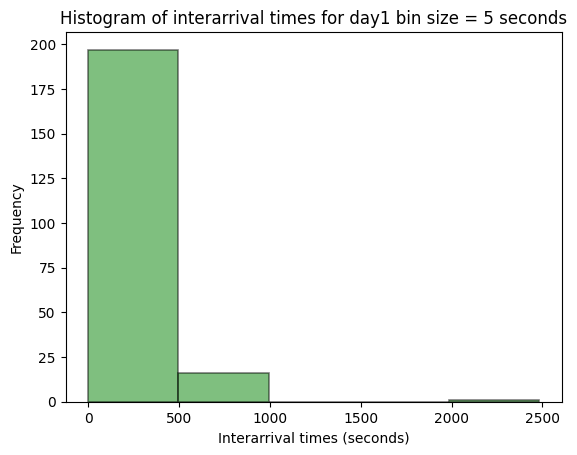

In [ ]:
# plot histogram for interarrival times 5 10 20 seconds
plt.hist(inter_day1  , bins=5, alpha=0.5, label='5 seconds', color='green', edgecolor='black', linewidth=1.2)
plt.title("Histogram of interarrival times for day1 bin size = 5 seconds")
plt.xlabel("Interarrival times (seconds)")
plt.ylabel("Frequency")
plt.show()


From bins=5, we can see that this type of bin size is just meaningless. Because, we can not see the data clearly. So, I will try with bins=10 and bins=20.

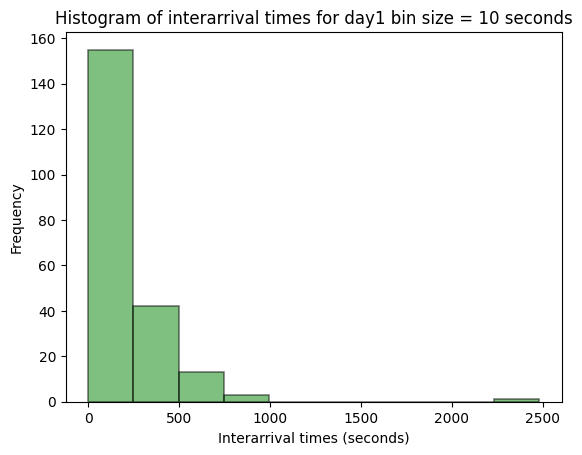

In [ ]:
plt.hist(inter_day1  , bins=10, alpha=0.5, label='5 seconds', color='green', edgecolor='black', linewidth=1.2)
plt.title("Histogram of interarrival times for day1 bin size = 10 seconds")
plt.xlabel("Interarrival times (seconds)")
plt.ylabel("Frequency")
plt.show()


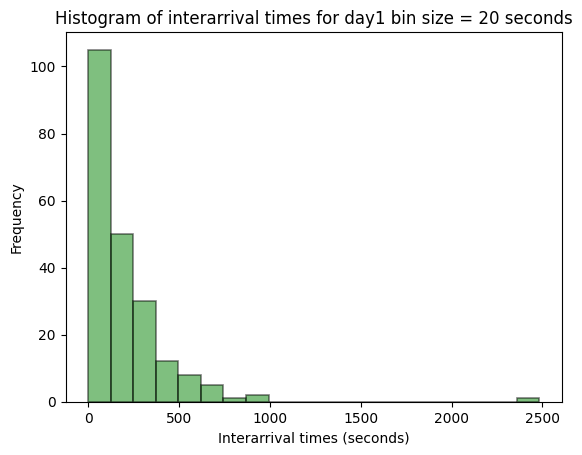

In [ ]:

plt.hist(inter_day1  , bins=20, alpha=0.5, label='5 seconds', color='green', edgecolor='black', linewidth=1.2)
plt.title("Histogram of interarrival times for day1 bin size = 20 seconds")
plt.xlabel("Interarrival times (seconds)")
plt.ylabel("Frequency")
plt.show()

Of course, the more we increse the bin size, the more the shape of the histogram gets meaningful. From the histogram where bin=20, we can easily see that the data is not distributed uniformly between 0 and 300 seconds. The data is more likely to be distributed exponentially. 

QUESTION 5)
Perform a chi-square test at a significance level of 0.05 with 10 intervals to test whether
the data comes from an exponential distribution where the mean is as found in step 3.

Firstly, I found the frequency_observed with class_length 250 and the number of intervals is 10.


In [ ]:
class_length       = int(max(inter_day1)/10) + 2
classes            = [i *  class_length for i in range(1,11)]
frequency_observed = [0 for i in range(10)]
for i in inter_day1:
    for j in range(10):
        if i <= classes[j]:
            frequency_observed[j] += 1
            break



Then, I will perform the chi-square test to see if the data is from an exponential distribution or not. To do so, firstly I create random numbers coming from an exponential distribution with the mean of the inter-arrival times.

In [ ]:
random_numbers_from_exponential = []
np.random.seed(5353)
for i in range(214):
    random_numbers_from_exponential.append(np.random.exponential(mean))
classes_1            = [i *  class_length for i in range(1,11)]
classes_0            = [i *  class_length for i in range(0,10)]
classes              = [i *  class_length for i in range(0,11)]
classes

[0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500]

 1 - e ^ (-x/mean) for x >= 0 and 0 otherwise.
 And Expected frequency is the number of data points times the probability of the random number to be in that interval.

In [ ]:
beta = 1/mean
def F(x):
    return 1 - math.exp(-beta*x)
frequency_expected = []
for i in range(1,11):
    frequency_expected.append(len(inter_day1) * (F(classes[i]) - F(classes[i-1])))
print("Class Interval  - Expected Frequency - Observed Frequency - Chi-Square - Chi-Square/Expected Frequency") 
for i in range(10):
    if classes_0[i] == 0:
        space = 3
    elif classes_0[i] <1000:
        space = 1
    else:
        space = 0

    if classes_1[i] <1000:
        space2 = 8
    else:
        space2 = 7

    if frequency_expected[i] > 99:
        space3 = 16
    elif frequency_expected[i] > 9:
        space3 = 17
    else:
        space3 = 18

    if frequency_observed[i] > 99:
        space4 = 14
    elif frequency_observed[i] > 9:
        space4 = 15
    else:
        space4 = 16
    
    if chisqure > 99:
        space5 = 10
    elif chisqure > 9:
        space5 = 11
    else:
        space5 = 12
    print(classes_0[i]," "*space, ":", classes_1[i], " "*space2, frequency_expected[i] )


Class Interval  - Expected Frequency - Observed Frequency - Chi-Square - Chi-Square/Expected Frequency
0     : 250          152.6790205892449
250   : 500          43.74965924302496
500   : 750          12.536317540509737
750   : 1000         3.592239578449938
1000  : 1250         1.0293441552739446
1250  : 1500         0.29495510164551475
1500  : 1750         0.08451839119204263
1750  : 2000         0.024218460402418263
2000  : 2250         0.006939718278976104
2250  : 2500         0.0019885529051406614


Since some classes has expected frequency less than 5, I will merge them with the next class. Then, I will perform the chi-square test again.

In [ ]:
expected_frequency = [i for i in frequency_expected[:3]]
expected_frequency.append(sum(frequency_expected[3:]))
frequency_expected = expected_frequency
observed_frequency = [i for i in frequency_observed[:3]]
observed_frequency.append(sum(frequency_observed[3:]))
frequency_observed = observed_frequency

max_ = classes_1[-1]
classes_1            = [i *  class_length for i in range(1,5)]
classes_1[-1]        = max_
classes_0            = [i *  class_length for i in range(0,4)]
print("Class Interval  - Expected Frequency - Observed Frequency - Chi-Square - Chi-Square/Expected Frequency") 
total = 0
for i in range(4):
    chisqure = (frequency_observed[i] - frequency_expected[i])**2
    chisqure_ef = chisqure/frequency_expected[i] 

    if classes_0[i] == 0:
        space = 3
    elif classes_0[i] <1000:
        space = 1
    else:
        space = 0

    if classes_1[i] <1000:
        space2 = 6
    else:
        space2 = 5

    if frequency_expected[i] > 99:
        space3 = 9
    elif frequency_expected[i] > 9:
        space3 = 10
    else:
        space3 = 11

    if frequency_observed[i] > 99:
        space4 = 7
    elif frequency_observed[i] > 9:
        space4 = 8
    else:
        space4 = 9
    
    if chisqure > 99:
        space5 = 6
    elif chisqure > 9:
        space5 = 7
    else:
        space5 = 8
    total += chisqure_ef
    print(classes_0[i]," "*space, ":", classes_1[i], " "*space2, frequency_expected[i] ," "*space3,  frequency_observed[i]," "*space4 , chisqure, " "*space5 , chisqure_ef)

Class Interval  - Expected Frequency - Observed Frequency - Chi-Square - Chi-Square/Expected Frequency
0     : 250        152.6790205892449           156         11.0289042466592         0.07223588548115237
250   : 500        43.74965924302496            41          7.560625952752584          0.17281565350610087
500   : 750        12.536317540509737            13          0.21500142323893948          0.017150285364437037
750   : 2500       5.034203958147975             4           1.0695778270489382          0.2124621560709319


Then we need to find the critical value from the table. We have 10 - 1 - 1 = 8 degrees of freedom and the significance level is 0.05. The critical value is 15.507. 

In [ ]:
print(total, " < 15.507")


0.47466398042262214  < 15.507


So, we can not reject the null hypothesis. In other words, we have no evidence to say that the data is not from an exponential distribution. Actually, we already knew that from the histogram. Since we have 200+ data, performing Kolmogorov-Smirnov test was not a good idea. That test is more suitable for small data sets. Since we have 200+ data, the chi-square test is more suitable for us. Since it sums all variance differences and compare it with the critical value.

QUESTION 6)
Draw the QQ-plot to test whether the data comes from an exponential distribution

Rank - Interarrival Time -      i-0.5/n -                 z
1          0.0             0.002336448598130841   0.007034026657379963
2          0.0             0.007009345794392523   0.011751016535518822
3          2.0             0.011682242990654205   0.016490361899415374
4          4.0             0.016355140186915886   0.02125227565965906
5          4.0             0.02102803738317757   0.026036973782995344
6          5.0             0.02570093457943925   0.030844675351098493
7          5.0             0.030373831775700934   0.03567560262076403
8          6.0             0.035046728971962614   0.04052998108556218
9          8.0             0.0397196261682243   0.04540803953899505
10         8.0             0.04439252336448598   0.050310010139201805
11         9.0             0.04906542056074766   0.05523612847525765
12         9.0             0.053738317757009345   0.06018663363511381
13         12.0            0.05841121495327103   0.0651617682752276
14         12.0            0.063

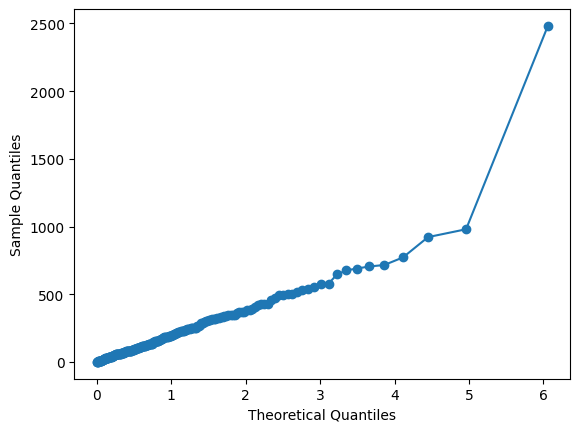

In [ ]:
np.random.seed(5353)
random_numbers_from_exponential = np.random.exponential(mean, 214)
random_numbers_from_exponential_sorted = sorted(random_numbers_from_exponential)
z = []
for i in range(1, len(inter_day1_sorted)+1):
    z.append(stats.expon.ppf((i-0.5)/len(inter_day1_sorted)))

print("Rank - Interarrival Time -      i-0.5/n -                 z")
for i in range(1, len(inter_day1_sorted)):
    if i >100:
        space =6
    elif i > 9:
        space = 7
    else:
        space = 8
    if inter_day1_sorted[i] > 999:
        space2 = 8
    elif inter_day1_sorted[i] > 99:
        space2 = 9
    elif inter_day1_sorted[i] > 9:
        space2 = 10
    else:
        space2 = 11
    print(i, " "*space, inter_day1_sorted[i], " "*space2, (i - 0.5)/len(inter_day1_sorted), " ",z[i])

plt.plot(z, inter_day1_sorted, marker='o')
#sm.qqplot(inter_day1_sorted, fit=True,dist=stats.expon)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()




We can see the trend and the line between two quantiles. The data is more likely to be distributed exponentially.

The next questions are for Day2.
QUESTION 1)
Plot the inter-arrival times based on the given set of observations. Is there an obvious
pattern? Visually evaluate whether the data has stationary mean, or not. Repeat for the
variance

Calculate the interarrival times and plot them.

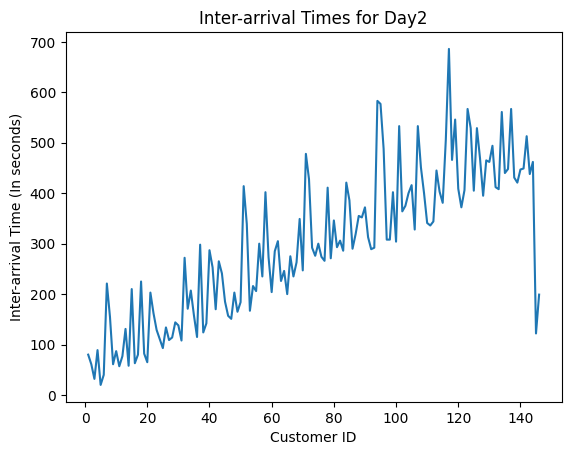

In [ ]:
inter_day2 = []
customer_id = [i for i in range(1, len(day2))] # len(day1) = 215
for i in range(0, len(day2)-1):
    a  = (day2[i+1]-day2[i]).total_seconds()
    inter_day2.append(a)
inter_day2

plt.plot(customer_id, inter_day2)
plt.title("Inter-arrival Times for Day2")
plt.xlabel("Customer ID")
plt.ylabel("Inter-arrival Time (In seconds)")
plt.show() 

In [ ]:
import numpy as np
import math
mean     = np.mean(inter_day2)
variance = np.var(inter_day2)
std_dev  = math.sqrt(variance)
median   = np.median(inter_day2)
print("Mean of interarrival times for Day2              : ", mean)
print("Variance of interarrival times for Day2          : ", variance)
print("Standard deviation of interarrival times for Day2: ", std_dev)
print("Median of interarrival times for Day2            : ", median)

Mean of interarrival times for Day2              :  295.43835616438355
Variance of interarrival times for Day2          :  21588.766747982736
Standard deviation of interarrival times for Day2:  146.9311632975889
Median of interarrival times for Day2            :  292.0


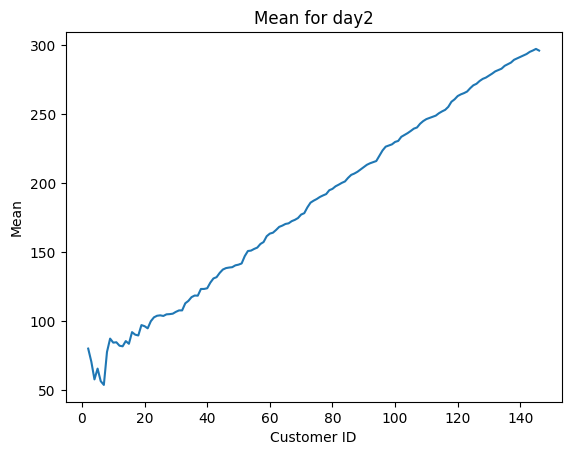

In [ ]:
#Mean
mean_list = []
for i in range(0, len(inter_day2)):
    mean_list.append(np.mean(inter_day2[0:i]))
plt.plot(customer_id, mean_list)
plt.title("Mean for day2")
plt.xlabel("Customer ID")
plt.ylabel("Mean")
plt.show()


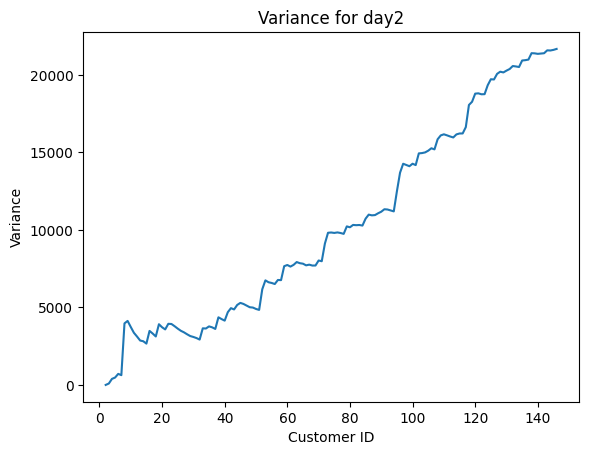

In [ ]:
#Variance
variance_list = []
for i in range(0, len(inter_day2)):
    variance_list.append(np.var(inter_day2[0:i]))
plt.plot(customer_id, variance_list)
plt.title("Variance for day2")
plt.xlabel("Customer ID")
plt.ylabel("Variance")
plt.show()

Text(0, 0.5, 'Autocorrelation')

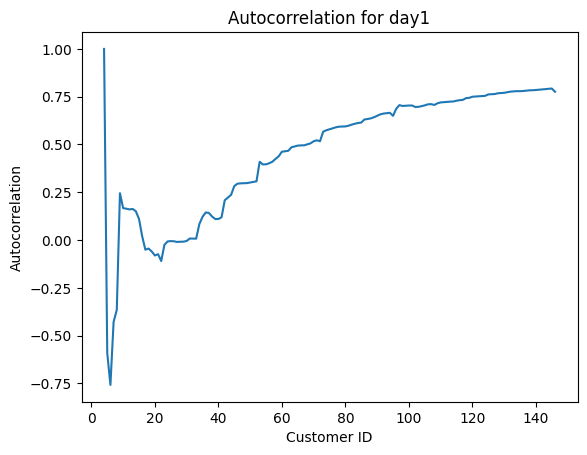

In [ ]:
import pandas as pd
#Autocorrelation
autocorr_list = []
for i in range(0, len(inter_day2)):
    autocorr_list.append(pd.Series(inter_day2[0:i]).autocorr())
plt.plot(customer_id, autocorr_list)
plt.title("Autocorrelation for day1")
plt.xlabel("Customer ID")
plt.ylabel("Autocorrelation")

This data is more easy to talk about. From the graphs we can easily say that neither the mean nor the variance is stationary. The mean and the variance are increasing.

QUESTION 2)
Explain what can be done to conduct an input analysis on this data set. 

Since the data's mean and variance are not stationary, we can not use the data as it is. We need to do some transformations to make the data stationary.  
When dealing with non-stationary data, fifferencing is one approach, which involves subtracting the current value of the data from the previous value to remove the trend or seasonality component. Detrending is another approach, which involves estimating and removing the trend component from the data through regression, smoothing, or decomposition. Additionally, transforming is also an option, which involves applying a mathematical function to the data such as taking the logarithm, square root, or power to stabilize the variance or reduce skewness.
(https://www.linkedin.com/advice/0/what-some-challenges-best-practices-trend-analysis#how-to-test-for-non-stationarity?)